<a href="https://colab.research.google.com/github/KhizarAziz/RP/blob/master/Research_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%capture
!pip install wandb

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import shutil
import os
import math
import dlib
from pathlib import Path
import wandb
from wandb.keras import WandbCallback
wandb.login()
#import fastai.vision

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + '0dev_folder/Data/'
colab_base_dir = '/content/'

Mounted at /content/gdrive


In [2]:
path = '/content/gdrive/MyDrive/Prep-Processed-Datasets/our-preprocessed-new'

In [4]:
cd gdrive/MyDrive/Prep-Processed-Datasets/

/content/gdrive/MyDrive/Prep-Processed-Datasets


In [ ]:
!tar -zcvf our-dataset-new.tar.gz our-preprocessed-new

In [ ]:
!zip -r our-dataset-new.zip our-preprocessed-new

# **C3AE**



> ## **`Github`**



In [5]:
!git clone https://github.com/KhizarAziz/RP.git

Cloning into 'RP'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 136 (delta 72), reused 62 (delta 30), pack-reused 25
Receiving objects: 100% (136/136), 76.35 MiB | 26.38 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [6]:
cd /content/RP

/content/RP


In [3]:
!git init #init .git file in a folder

Reinitialized existing Git repository in /content/RP/.git/


In [4]:
# configure my name and email
!git config --global user.email '.@gmail.com'
!git config --global user.name ''

In [6]:
# stage all files (changes ) in current dir
# !git add -A # commit all
# !git add ./m_net_training/C3AE_net.py
# !git add ./detect/shape_predictor_68_face_landmarks.dat
# !git add ./m_preprocess_dataset/pre_process_WIKI-IMDB.py
# !git add ./m_preprocess_dataset/pre_process_Morph.py
# !git add ./m_preprocess_dataset/pre_process_FGNET.py
# !git add ./detect/mmod_human_face_detector.dat
# !git add ./m_net_training/training_utils.py
!git add ./requirements.txt

In [7]:
# check status which files have been updated
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   requirements.txt



In [8]:
# commit staged changes
!git commit -m 'Added requirements.txt'

[master b77a922] Added requirements.txt
 1 file changed, 379 insertions(+)
 create mode 100644 requirements.txt


In [9]:
#display which remote branch is being used (empty in start)
!git remote

origin


In [10]:
# setting up a remote branch with login credentials
!git remote add MyOrigin https://@github.com/KhizarAziz/RP.git

In [11]:
# push to origin
!git push MyOrigin master

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 3.33 KiB | 3.33 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/KhizarAziz/RP.git
   c933b0b..b77a922  master -> master




> ## **`Download Datasets and Code`**



In [ ]:
# OWN Dataset
# pth = Path('/content/gdrive/My Drive/Final_Dataset')
# csv_path = '/content/gdrive/MyDrive/Final_Dataset/dataset-meta.csv'
# i = 0
# for filename in pth.glob('*.tar.gz'):
#   # if i > 2:
#   new_path = shutil.copy(filename,'/content/')
#   print('copied file ',new_path)
#   shutil.unpack_archive(new_path,'/content/RP/dataset/Dataset/')
#   print('unpacked ')
#   break
#   # i += 1
#shutil.copy(csv_path,'/content/RP/dataset/Dataset/dataset-meta.csv')

In [ ]:
import shutil
#WIKI
# shutil.copy('/content/gdrive/My Drive/0dev_folder/Previous Datasets/wiki_crop.tar', '/content/')
# IMDB
# shutil.copy('/content/gdrive/My Drive/0dev_folder/Previous Datasets/imdb_crop.tar', '/content/')
# MORPH
# shutil.copy('/content/gdrive/My Drive/0dev_folder/Previous Datasets/Morph.tar', '/content/')
# FGNET
shutil.copy('/content/gdrive/MyDrive/0dev_folder/Previous Datasets/FGNET.zip', '/content/')

'/content/FGNET.zip'

In [ ]:
cd /content/

/content


In [ ]:
#extract datasets
# !tar -xvf imdb_crop.tar -C /content/RP/dataset
# !tar -xvf wiki_crop.tar -C /content/RP/dataset
# morph data
# !tar -xvf Morph.tar -C /content/RP/dataset
# FGNET data
!unzip -q FGNET.zip -d /content/RP/dataset/ # unzip zip file

In [ ]:
#download face landmark predictor
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_5_face_landmarks.dat.bz2
# !bzip2 -d /content/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
#download imdb
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
#download WIKI
# !wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar



> ## **`Preprocess Datasets`**



In [ ]:
cd /content/RP/

/content/RP


In [ ]:
# Mine Dataset
# !python /content/RP/m_preprocess_dataset/pre_process_dataset.py
#Wiki-IDMB
# !python /content/RP/m_preprocess_dataset/pre_process_WIKI-IMDB.py
#Morph
#!python /content/RP/m_preprocess_dataset/pre_process_Morph.py
#FGNET
# !python /content/RP/m_preprocess_dataset/pre_process_FGNET.py

In [ ]:
p = Path('/content')
for f in p.glob('*.jpg'):
  os.remove(f)



> ## **`Train`**



In [5]:
!git clone https://github.com/KhizarAziz/RP.git #clone repo

Cloning into 'RP'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 133 (delta 71), reused 60 (delta 30), pack-reused 25
Receiving objects: 100% (133/133), 76.35 MiB | 31.04 MiB/s, done.
Resolving deltas: 100% (73/73), done.


In [7]:
cd /content/RP

/content/RP


In [8]:
import math
from m_net_training import C3AE_net
from m_net_training import training_utils
#from m_net_training.training_utils import CyclicLR
import feather
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau
from keras.losses import kl_divergence,MAE
from keras.metrics import mae,Accuracy
import tensorflow as tf

In [9]:
# initialize wandb with your project name and optionally with configutations.
category = 12
interval = 10
run = wandb.init(project='rp',
           config={
              "Age_Loss": 'mean_absolute_error',
              "CLR_METHOD": 'triangular',
              "MAX_LR": 0.005,
              "MIN_LR": 1.000e-7,
              "NUM_EPOCHS": 25,
              "STEP_SIZE": 5,
              "W1_Loss": 'kl_divergence',
              'architecture':'architecture??',
              'batch_size':64,
              'dataset':'our-preprocessed-new',
              'dropout':0.2,
              'crop_margin':-10,
              'pose_aware_cropper':True,
              'img_ch':3,
              'img_h':64,
              'img_w':64,
              'random_enforcing':False,
              'random_erasing':False,
              'seed':2021,
              'test_split':0.2,
              'train_split':0.8,
              'use_SE_block':True,
              'use_white_norm':True
           })
config = wandb.config

wandb: Currently logged in as: khizerawan (use `wandb login --relogin` to force relogin)


In [10]:
#Loading dataset (from .feather file)
dataset_dir = Path(f'/content/gdrive/MyDrive/Prep-Processed-Datasets/{config.dataset}/')
dataset_df = pd.DataFrame(columns=["image_path","age","PredictedAge", "gender", "image", "org_box", "landmarks"])
for fnames in dataset_dir.glob('*.feather'):
  #ashutil.copy(fnames,'/content/gdrive/MyDrive/Prep-Processed-Datasets/own-data-preprocessed/')
  df_chunk = feather.read_dataframe(dataset_dir.joinpath(fnames))
  dataset_df = pd.concat([dataset_df,df_chunk],ignore_index=True)
dataset_df = dataset_df[['image_path','age',"PredictedAge",'gender','image','org_box','landmarks']]
dataset_df = dataset_df.astype({'age': 'float64'})
# removing age outliers
dataset_df['AgeDifference'] = abs(dataset_df['PredictedAge'] - dataset_df['age'])
# dataset_df.hist()
dataset_df.shape

(1574368, 8)

In [57]:
df = dataset_df[dataset_df.age < 15]

1.0 21.367904663085934


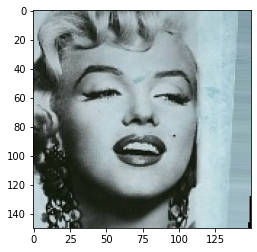

In [72]:
index += 1
row = df.iloc[index]
img = np.frombuffer(row["image"], np.uint8)
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
print(row['age'],row['PredictedAge'])
plt.imshow(img)

In [ ]:
dataset_df.hist()

In [ ]:
dataset_df.groupby('gender').hist()

In [10]:
#validation split using sklearn.model_selection's train_test_split method
trainset, testset = train_test_split(dataset_df, train_size=config.train_split, test_size=config.test_split, random_state=config.seed)
# dataset_df = pd.DataFrame()

In [11]:
import imp
imp.reload(training_utils)
#making a generator for image and dataset. inside generator we 
#load img, crop faces (3 sizes -> big,middle,small) then tranform (if aumentation is true) rotate,birhgt etc ect
#convert age into 2 point represenation (like on hot encoding, but has fractions)
input_shape = (config.img_h,config.img_w)
# crop_margin = -20
train_gen =     training_utils.img_and_age_data_generator(trainset,batch_size=config.batch_size,category=category,interval=interval,imgs_shape=input_shape,random_erasing=config.random_erasing,random_enforcing=config.random_enforcing,dropout=config.dropout,pose_aware_cropper=config.pose_aware_cropper,gap_margin=config.crop_margin)
validation_gen = training_utils.img_and_age_data_generator(testset,batch_size=config.batch_size,category=category,interval=interval,imgs_shape=input_shape,random_erasing=False,random_enforcing=False,dropout=0.0,pose_aware_cropper=config.pose_aware_cropper,gap_margin=config.crop_margin)
# print(trainset.groupby(["age"])["age"].agg("count"))

In [12]:
index = 1
first_batch = next(iter(train_gen))
print(type(first_batch[1][0]),type(first_batch[1][1]))  # 2nd item -> 2nd item -> 1st item :::: (because i know this hierarchy)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


30.0


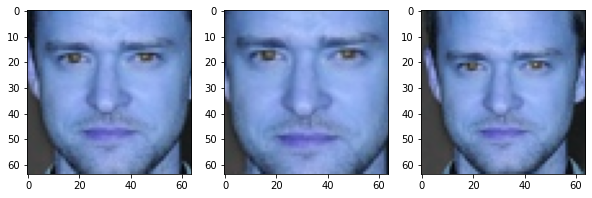

In [13]:
# train on old datset, and see if accruacy is same
index += 1
Accepted_List = [first_batch[0][0][index],first_batch[0][1][index],first_batch[0][2][index]] # list of [image_path,age]
print(first_batch[1][0][index])
f,axarr = plt.subplots(nrows=1,ncols=3,figsize=(10,10))
for i in range(3):
    img = Accepted_List[i]
    # axarr[i].set_title(str(Accepted_List[i].shape),fontsize = 20)
    axarr[i].imshow(img)
#f.savefig('/content/test.jpg')

In [15]:
# get distribution of ages i.e how many number of rows for each interval i.e lets say for 0-10 years age we have 5000 entries(rows)
age_distribution = [trainset["age"][(trainset.age >= x -10) & (trainset.age <= x)].count() for x in range(10, 101, 10)]
age_distribution = [age_distribution[0]] + age_distribution + [age_distribution[-1]]
print(age_distribution)

[646, 646, 32382, 190434, 378880, 342720, 187411, 100833, 44909, 8667, 226, 226]


In [ ]:
# !wget https://api.wandb.ai/files/khizerawan/rp/315y4bqn/model-best.h5

In [16]:
# clear some memory
import gc
trainset_size = len(trainset)
testset_size = len(testset)
del dataset_df
del trainset
del testset
gc.collect()

228

In [17]:
import imp
imp.reload(C3AE_net)
# pretrain_weights_path = "/content/RP/model-best.h5"
#Initialize model like you usually do
tf.keras.backend.clear_session()
model = C3AE_net.build_model(Categories = 12, using_SE=True, using_white_norm=True)
#if pretrain_weights_path and os.path.exists(pretrain_weights_path):
#building C3AE network for training
# model.load_weights(pretrain_weights_path)
#pretrain_weights_path
#models = load_model(params.pretrain_path, custom_objects={"pool2d": pool2d, "ReLU": ReLU, "BatchNormalization": BatchNormalization, "tf": tf, "focal_loss_fixed": focal_loss(age_dist)})
#model.summary()

In [ ]:
model.summary()

In [ ]:
model.get_layer("SRAE").summary()

### **`Compile_model`**

In [18]:
adam = Adam(lr=config.MIN_LR)
#cate_weight = K.variable(params.weight_factor)
weight_factor = 10
model.compile(
    optimizer=adam,
    #loss=["mae", training_utils.focal_loss(age_distribution)],  # "kullback_leibler_divergence"
    loss = {'W1':config.W1_Loss,'age':config.Age_Loss},
    #metrics={"age": "mae", "W1": "mae", "gender": "acc"},
    metrics={"age": mae,"W1":'accuracy'},
    loss_weights={'W1':weight_factor, 'age': 1}
    #loss_weights=[1, params.weight_factor, 5]
)
# W2 = model.get_layer("age")

In [19]:
class meriApniCustom_lr_history(tf.keras.callbacks.Callback):
  def on_epoch_begin(self,epoch, logs={}):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      print('our lr is: {} '.format(lr))
  def on_epoch_end(self, epoch, logs=None):
      gc.collect() # explicitly free memory after each epoch

#thres_callback = ThresCallback(cate_weight, models.get_layer("age_mean_absolute_error"), 10, 10)
# def get_weights(epoch, loggs):
#     print('get_weights ',epoch, tf.keras.backend.get_value(models.optimizer.lr), W2.get_weights())

In [21]:
save_path = '/content/RP/m_models_saved/morph-'
callbacks = [
  ModelCheckpoint(save_path+'weights.{epoch:02d}-{val_age_mean_absolute_error:.2f}.hdf5',
                  monitor='val_age_mean_absolute_error',
                  verbose = 1,
                  save_best_only=True,
                  model ='min'),
 
   training_utils.CyclicLR(
                    mode=config.CLR_METHOD,
                    base_lr=config.MIN_LR,
                    max_lr=config.MAX_LR,
                    step_size=config.STEP_SIZE * (trainset_size // config.batch_size)),
               
  # ReduceLROnPlateau(monitor='val_age_mean_absolute_error', #considered metric
  #                   factor = 0.5, # learning_rate * factor (multiply lr 0.6 to reduce it)
  #                   patience = 3,# agr considered metric, plateau for patience epochs
  #                   min_delta = 0.01, # if model didnt improve this much
  #                   cooldown = 2, # wait this much more epochs before things back normal
  #                   min_lr = 0.0001,
  #                   mode = 'min'),
  meriApniCustom_lr_history(),
 
  WandbCallback(monitor='val_age_loss')
]

### **`Find_lr`**

In [ ]:
# lrf = training_utils.LearningRateFinder(model)

In [ ]:
lrf.find(
  train_gen,#aug.flow(trainX, trainY, batch_size=config.BATCH_SIZE),
  1e-6, 1e+1,
  stepsPerEpoch=len(trainset) / config.batch_size,
  batchSize=config.batch_size)

NameError: ignored

In [ ]:
lrf.plot_loss()

### **`Fit`**

In [22]:
model.fit(train_gen, steps_per_epoch=trainset_size / config.batch_size, epochs=config.NUM_EPOCHS, callbacks=callbacks, validation_data=validation_gen, validation_steps=testset_size / config.batch_size)

Epoch 1/25
our lr is: 1.0000000116860974e-07 
18306/18306 [==============================] - 4837s 262ms/step - loss: 51.8451 - age_loss: 40.8707 - W1_loss: 1.0974 - age_mean_absolute_error: 40.8707 - W1_accuracy: 0.3710 - val_loss: 30.7437 - val_age_loss: 24.8027 - val_W1_loss: 0.5941 - val_age_mean_absolute_error: 24.8027 - val_W1_accuracy: 0.5554

Epoch 00001: val_age_mean_absolute_error improved from inf to 24.80270, saving model to /content/RP/m_models_saved/morph-weights.01-24.80.hdf5
Epoch 2/25
our lr is: 0.0010001346236094832 
18306/18306 [==============================] - 4789s 262ms/step - loss: 23.2196 - age_loss: 17.0557 - W1_loss: 0.6164 - age_mean_absolute_error: 17.0557 - W1_accuracy: 0.5422 - val_loss: 10.7768 - val_age_loss: 5.0278 - val_W1_loss: 0.5749 - val_age_mean_absolute_error: 5.0278 - val_W1_accuracy: 0.5744

Epoch 00002: val_age_mean_absolute_error improved from 24.80270 to 5.02779, saving model to /content/RP/m_models_saved/morph-weights.02-5.03.hdf5
Epoch 3/

KeyboardInterrupt: ignored

In [ ]:
#models.save('/content/moyModel.h5')history.history['loss']
print(history.history.keys())

In [ ]:
a= [1,2,3,4,5]

In [ ]:
a[start : end :step_size]

In [ ]:
a[0:5]

[1, 2, 3, 4, 5]

In [ ]:
import selenium

In [ ]:
from keras.losses import MAE

In [ ]:
round(history.history['loss'][-1],3)

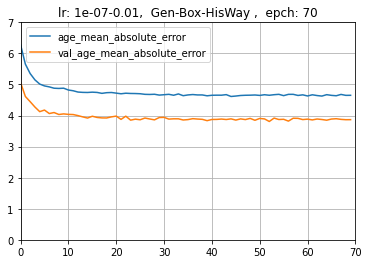

In [ ]:
plt.title(f"lr: {MIN_LR}-{MAX_LR},  Gen-Box-HisWay ,  epch: {NUM_EPOCHS}")
plt.plot(history.history['age_mean_absolute_error'])
plt.ylim(0,7)
plt.grid(axis='both')
plt.xlim(0,70)
plt.plot(history.history['val_age_mean_absolute_error'])
plt.legend(['age_mean_absolute_error', 'val_age_mean_absolute_error'], loc='upper left')
best_score = round(min(history.history['val_age_mean_absolute_error']),2)
plt.savefig('/content/gdrive/MyDrive/'+str(best_score)+'.png')
plt.show()

In [ ]:
#model.reset_metrics()

In [ ]:
model.save(f'/content/{best_score}-Model.h5')



> ## **`Inference`**






In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/C3AE/detect/shape_predictor_68_face_landmarks.dat")
def gen_face(image):
  face_rect_list = detector(image)
  xmin, ymin, xmax, ymax = face_rect_list[0].left() , face_rect_list[0].top(), face_rect_list[0].right(), face_rect_list[0].bottom() # face_rect is dlib.rectangle object, so extracting values from it
  lmarks_list = dlib.full_object_detections()
  for face_rect in face_rect_list:
    lmarks_list.append(predictor(image, face_rect)) # getting landmarks as a list of objects
  return np.array([xmin, ymin, xmax, ymax]), lmarks_list

def gen_boundbox(box, landmark):
    # getting 3 boxes for face, as required in paper... i.e feed 3 different sized images to network (R,G,B) 
    xmin, ymin, xmax, ymax = box # box is [ymin, xmin, ymax, xmax]
    w, h = xmax - xmin, ymax - ymin
    nose_x, nose_y = (landmark.parts()[30].x, landmark.parts()[30].y) # calculating nose center point, so the triple boxes will be cropped according to nose point
    w_h_margin = abs(w - h)
    top2nose = nose_y - ymin
    # Contains the smallest frame
    return np.array([
        [(xmin - w_h_margin, ymin - w_h_margin), (xmax + w_h_margin, ymax + w_h_margin)],  # out
        [(nose_x - top2nose, nose_y - top2nose), (nose_x + top2nose, nose_y + top2nose)],  # middle
        [(nose_x - w//2, nose_y - w//2), (nose_x + w//2, nose_y + w//2)]  # inner box
    ])

In [ ]:
img = cv2.imread('/content/test.jpg')
model = models

In [ ]:
try:
    bounds, lmarks = gen_face(img)
except Exception as e:
  print(e)

padding = 200
cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_CONSTANT)

In [ ]:
for pidx,landmarks in enumerate(lmarks):
    trible_box = gen_boundbox(bounds, landmarks)
    tri_imgs = []
    for bbox in trible_box:
        bbox = bbox #+ padding
        h_min, w_min = bbox[0]
        h_max, w_max = bbox[1]
        tri_imgs.append(cv2.resize(new_bd_img[w_min:w_max, h_min:h_max], (64, 64)))
    print(np.array(tri_imgs).shape)

In [ ]:
testing_imgs = []
for img in tri_imgs:
  new_img = np.expand_dims(img,axis=0)
  testing_imgs.append(new_img)

In [ ]:
result = models.predict(testing_imgs)

In [ ]:
result

In [ ]:
img = tri_imgs[0]

In [ ]:
a = np.expand_dims(img,axis=0)

In [ ]:
1.0071468e-01



> ## **`playground`**



In [ ]:
cd /content/

/content


In [ ]:

!git clone https://github.com/jacobgil/keras-grad-cam.git

In [ ]:
!python /content/keras-grad-cam/grad-cam.py /content/keras-grad-cam/examples/cat_dog.png

In [ ]:
# ----------------------------------NEW NET-----------------------------

def CBTM2(input_height=64, input_width=64, input_channels=3):
  input_X = Input(shape=(input_height, input_width, input_channels))
  w1 = Lambda(white_norm,name='white_norm')(input_X)
  s = Conv2D(16,(4,4))(w1)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = MaxPooling2D(2,2)(s)
  s = Conv2D(32,(4,4))(s)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = MaxPooling2D(2,2)(s)
  s = Conv2D(64,(2,2))(s)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s) 
  outtt = GlobalAveragePooling2D()(s)
  outtt = Dense(8,activation='relu')(outtt)
  return Model(inputs=[input_X], outputs=[outtt])


def CBRA2(input_height=64, input_width=64, input_channels=3):
  input_R = Input(shape=(input_height, input_width, input_channels))
  w1 = Lambda(white_norm,name='white_norm')(input_R)
  s = Conv2D(16,(4,4))(w1)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('relu')(s)
  s = AveragePooling2D(2,2)(s)
  s = Conv2D(32,(4,4))(s)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('relu')(s)
  s = AveragePooling2D(2,2)(s)
  s = Conv2D(64,(2,2))(s)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('relu')(s)
  outt = GlobalAveragePooling2D()(s)
  outt = Dense(8,activation='relu')(outt)
  return Model(inputs=[input_R], outputs=[outt])


def model_new(Categories=12, input_height=64, input_width=64, input_channels=3, using_white_norm=True, using_SE=True):

  x1 = Input(shape=(input_height, input_width, input_channels))
  x2 = Input(shape=(input_height, input_width, input_channels))
  x3 = Input(shape=(input_height, input_width, input_channels))

  CBT = CBTM2(input_height=input_height,input_width=input_width,input_channels=input_channels)
  CBR = CBRA2(input_height=input_height,input_width=input_width,input_channels=input_channels)

  # set_trace()
  y1 = CBT(x1)
  y2 = CBT(x2)
  y3 = CBR(x3)

  cfeat = Concatenate(axis=-1)([y1,y2,y3])
  cfeat = Dropout(0.3)(cfeat)
  Fc1 = Dense(120, use_bias=True, activity_regularizer=regularizers.l1(0), activation=LeakyReLU(alpha=0.1), name="FC1")(cfeat)
  bulk_feat = Dense(Categories, use_bias=True, activity_regularizer=regularizers.l1(0), activation='softmax', name="W1")(Fc1)
  age = Dense(1, name="age")(bulk_feat)
  
  return Model(inputs=[x1,x2,x3], outputs=[age, bulk_feat])


# **My Own Dataset Experiments**

In [ ]:
pth = Path('/content/gdrive/MyDrive/Final_Dataset')
csv_path = '/content/gdrive/MyDrive/Final_Dataset/dataset-meta.csv'

In [ ]:
i = 0
for filename in pth.glob('*.tar.gz'):
  # if i > 2:
  print('will copy',filename)
  new_path = shutil.copy(filename,'/content/')
  print('copied file',new_path)
  shutil.unpack_archive(new_path,'/content/RP/dataset/Dataset/')
  print('unpacked')
  # break
  # i += 1
shutil.copy(csv_path,'/content/RP/dataset/Dataset/dataset-meta.csv')

In [ ]:
cd /content/RP/

/content/RP


In [ ]:
img = '/content/RP/dataset/Dataset/0/nm0000003/r9axw1.jpg'
plt.imshow(cv2.imread(img))

In [ ]:
#Wiki-IDMB
#!python /content/RP/m_preprocess_dataset/pre_process_WIKI-IMDB.py
#Morph
#!python /content/RP/m_preprocess_dataset/pre_process_Morph.py
#Mine Dataset
!python /content/RP/m_preprocess_dataset/pre_process_dataset.py

2632000 : processed and useful  2742
2635000 : processed and useful  4135
succesfully saved as feather to  /content/gdrive/MyDrive/Prep-Processed-Datasets/our-preprocessed/mine-data_2636797.feather
chunk saved of size  5000
2641000 : processed and useful  2039
2646000 : processed and useful  4261
2647000 : processed and useful  4674


In [ ]:
p = Path('/content')
for f in p.glob('*.jpg'):
  os.remove(f)

In [ ]:
shutil.copy(csv_path,'/content/RP/dataset/mine/')

'/content/RP/dataset/mine/dataset-meta.csv'

In [ ]:
# load meta-CSV
df = pd.read_csv(csv_path)
df

In [ ]:
df.copy().reset_index()

,index,nconst,age,gender,country,imageName,imgPath
0,0,nm0000001,56,M,"Omaha, Nebraska, USA",bpttck.jpg,Dataset/0/nm0000001/bpttck.jpg
1,1,nm0000001,36,M,"Omaha, Nebraska, USA",c466bx.jpg,Dataset/0/nm0000001/c466bx.jpg
2,2,nm0000001,36,M,"Omaha, Nebraska, USA",a14p7x.jpg,Dataset/0/nm0000001/a14p7x.jpg
3,3,nm0000001,54,M,"Omaha, Nebraska, USA",bptw5t.jpg,Dataset/0/nm0000001/bptw5t.jpg
4,4,nm0000001,36,M,"Omaha, Nebraska, USA",c46e04.jpg,Dataset/0/nm0000001/c46e04.jpg
...,...,...,...,...,...,...,...
2647141,2647141,nm1864458,43,M,"Brooklyn, New York, USA",r5a209.jpg,Dataset/8/nm1864458/r5a209.jpg
2647142,2647142,nm1864458,43,M,"Brooklyn, New York, USA",r5a204.jpg,Dataset/8/nm1864458/r5a204.jpg
2647143,2647143,nm1864458,43,M,"Brooklyn, New York, USA",r5a207.jpg,Dataset/8/nm1864458/r5a207.jpg
2647144,2647144,nm1864458,43,M,"Brooklyn, New York, USA",r5a208.jpg,Dataset/8/nm1864458/r5a208.jpg


# **Model_Backup**

In [ ]:
def gen_triple_face_box(box,landmarks,percent_margin=30):
  xmin, ymin, xmax, ymax = box 
  h = xmax - xmin
  #calculate gap value for bigger box
  gap_margin = round(h * percent_margin/100)
  
  # inner-box
  left_margin,right_margin = get_margin_right_left(landmarks,gap_margin)
  # print(left_margin,right_margin)
  if right_margin != 0:
    if 0.66 < left_margin/right_margin < 1.55:
      xmin, ymin, xmax, ymax = evaluate_face_box(xmin, ymin, xmax, ymax, landmarks,force_align=True) 
    else:
      xmin, ymin, xmax, ymax = xmin-5, ymin-5, xmax+5, ymax+5
  box_array = [[(xmin,ymin),(xmax,ymax)]]
  
  # middle box
  left_margin,right_margin = get_margin_right_left(landmarks,gap_margin) # calculate gap_margin right and left
  up_margin , down_margin  = get_margin_up_down_split(gap_margin)
  new_X =  int(xmin - left_margin)
  new_Y = int(ymin - up_margin)
  new_X2 = int(xmax + right_margin)
  new_Y2 = int(ymax + down_margin)
  new_X,new_Y,new_X2,new_Y2 = evaluate_face_box(new_X,new_Y,new_X2,new_Y2,landmarks,force_align=True)
  box_array.append([(new_X,new_Y),(new_X2,new_Y2)])
  # outer box
  gap_margin = gap_margin*-1.3 # because 3rd box will be further outside
  left_margin,right_margin = get_margin_right_left(landmarks,gap_margin) # calculate gap_margin right and left
  up_margin , down_margin  = get_margin_up_down_split(gap_margin)
  new_X = int(xmin - left_margin)
  new_Y = int(ymin - up_margin)
  new_X2 =int(xmax + right_margin)
  new_Y2 =int(ymax + down_margin)
  new_X,new_Y,new_X2,new_Y2 = evaluate_face_box(new_X,new_Y,new_X2,new_Y2,landmarks)
  box_array.append([(new_X,new_Y),(new_X2,new_Y2)])
  return np.array(box_array) 

In [ ]:
#--------------------- MY CUSTOM MODEL... SRAE -------------------
# score  = 6.45
def CBRA(inputs):
  x = Conv2D(32,(3,3))(inputs)
  x = BatchNormalization(axis=-1)(x)
  x = Activation('relu')(x)
  x = SE_BLOCK(input=x)
  x = Dropout(0.2)(x)
  x = Conv2D(32,(5,5))(x)
  x = BatchNormalization(axis=-1)(x)
  x = Activation('relu')(x)
  x = SE_BLOCK(input=x)
  x_layer = AveragePooling2D(2,2)(x)
  return x_layer

# stream 2 module
def CBTM(inputs):
  s = Conv2D(2,(1,1))(inputs)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = SE_BLOCK(input=s)
  s = Conv2D(4,(2,2))(inputs)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = SE_BLOCK(input=s)
  s = Dropout(0.2)(s)
  s = Conv2D(8,(3,3))(inputs)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = SE_BLOCK(input=s)
  s = Dropout(0.2)(s)    
  s = Conv2D(16,(5,5))(s)
  s = BatchNormalization(axis=-1)(s)
  s = Activation('tanh')(s)
  s = SE_BLOCK(input=s)
  s_layer = MaxPooling2D(2,2)(s)   
  return s_layer

def PB(inputs):
  # s_layer2_mix = Flatten()(inputs)
  s_layer2_mix = GlobalAveragePooling2D()(inputs)
  s_layer2_mix = Dense(12,activation='relu',activity_regularizer=regularizers.l1(0))(s_layer2_mix)
  s_layer2_mix = Dropout(0.3)(s_layer2_mix)
  s_layer2_mix = Dense(3,activation='relu')(s_layer2_mix)
  return s_layer2_mix

def first_embd(x1,isPB_Block=False):
  x = CBRA(x1)
  y = CBTM(x1)
  if isPB_Block:
    x = PB(x)
    y = PB(y)
    first_embd = Multiply()([x,y])
    return first_embd
  else:
    return x,y

def second_embd(x1,isPB_Block=False):
  x,y = first_embd(x1,False)
  x = CBRA(x)
  y = CBTM(y)
  if isPB_Block:
    x = PB(x)
    y = PB(y)
    scnd_embd = Multiply()([x,y])
    return scnd_embd
  else:
    return x,y

def third_embd(x1):
  x,y = second_embd(x1,False)
  x = CBRA(x)
  y = CBTM(y)
  x = PB(x)
  y = PB(y)
  scnd_embd = Multiply()([x,y])
  return scnd_embd


def build_ssr(Categories, input_height, input_width, input_channels, using_white_norm=True, using_SE=True):
  input_X = Input(shape=(input_height, input_width, input_channels))
  w1 = Lambda(white_norm,name='white_norm')(input_X)
  #--------- STREAM 1 ---------
  frst_embd = first_embd(w1,isPB_Block=True)
  scnd_embd = second_embd(w1,isPB_Block=True)
  thrd_embd = third_embd(w1)
  cfeat = Concatenate(axis=-1)([frst_embd, scnd_embd,thrd_embd])
  return Model(inputs=[input_X], outputs=[cfeat],name='SRAE')


def build_model(Categories=12, input_height=64, input_width=64, input_channels=3, using_white_norm=True, using_SE=True):
  x1 = Input(shape=(input_height, input_width, input_channels))
  x2 = Input(shape=(input_height, input_width, input_channels))
  x3 = Input(shape=(input_height, input_width, input_channels))
  ssr_model = build_ssr(Categories=Categories,input_height=input_height,input_width=input_width,input_channels=input_channels, using_white_norm=using_white_norm, using_SE=using_SE)

  y1 = ssr_model(x1)
  y2 = ssr_model(x2)
  y3 = ssr_model(x3)

  cfeat = Concatenate(axis=-1)([y1, y2,y3])
  bulk_feat = Dense(Categories, use_bias=True, activity_regularizer=regularizers.l1(0), activation='softmax', name="W1")(cfeat)
  m = Dropout(0.2)(bulk_feat)
  age = Dense(1, name="age")(m)  
  return Model(inputs=[x1,x2,x3], outputs=[age, bulk_feat])


In [ ]:
# backup min-data-preprocess

import pandas as pd
import numpy as np
import cv2
# import json # to serialize objects, so can be stored as string in pandas's feather file
# import matplotlib.pyplot as plt
from pathlib import Path
import dlib
from pose import get_rotation_angle

# process it to detect faces, detect landmarks, align, & make 3 sub boxes which will be used in next step to feed into network
# save dataset as pandas,feather & imencode for size efficiency


def gen_boundbox(box, landmark):
    # getting 3 boxes for face, as required in paper... i.e feed 3 different sized images to network (R,G,B) 
    xmin, ymin, xmax, ymax = box # box is [ymin, xmin, ymax, xmax]
    w, h = xmax - xmin, ymax - ymin
    nose_x, nose_y = (landmark.parts()[30].x, landmark.parts()[30].y) # calculating nose center point, so the triple boxes will be cropped according to nose point
    w_h_margin = abs(w - h)
    top2nose = nose_y - ymin
    # Contains the smallest frame
    return np.array([
        [(xmin - w_h_margin, ymin - w_h_margin), (xmax + w_h_margin, ymax + w_h_margin)],  # out
        [(nose_x - top2nose, nose_y - top2nose), (nose_x + top2nose, nose_y + top2nose)],  # middle
        [(nose_x - w//2, nose_y - w//2), (nose_x + w//2, nose_y + w//2)]  # inner box
    ])


def gen_equal_boundbox(box,gap_margin=30):
    # getting 3 boxes for face, as required in paper... i.e feed 3 different sized images to network (R,G,B) 
    xmin, ymin, xmax, ymax = box # box is [ymin, xmin, ymax, xmax]
    w, h = xmax - xmin, ymax - ymin

    percentMargin = gap_margin/100 # 30% margin
    margin_y = int(h * percentMargin)
    margin_x = int(h * percentMargin)

    # calculating new coordinates
    new_X =  xmin - margin_x 
    new_Y = ymin - margin_y
    new_X2 = xmax + int(margin_x) # mutliply by 2 because x is going backwards by same value, so adding 2 times margin
    new_Y2 = ymax + int(margin_y) # mutliply by 2 because y is going Upwards by same value

    return np.array([[(xmin,ymin),(xmax,ymax)], # original box
                    [(new_X,new_Y),(new_X2,new_Y2)]]) #  outer box


def detect_faces_and_landmarks(image):
  face_rect_list = detector(image)
  img_face_count = len(face_rect_list) # number of faces found in image
  if img_face_count < 1:
    return 0,[],[] # no face found, so return 

  xmin, ymin, xmax, ymax = face_rect_list[0].left() , face_rect_list[0].top(), face_rect_list[0].right(), face_rect_list[0].bottom() # face_rect is dlib.rectangle object, so extracting values from it
  
  # make a landmarks_list of all faces detected in image
  lmarks_list = dlib.full_object_detections()
  for face_rect in face_rect_list:
    lmarks_list.append(predictor(image, face_rect)) # getting landmarks as a list of objects
  
  return img_face_count,np.array([xmin, ymin, xmax, ymax]), lmarks_list

def loadData_preprocessData_and_makeDataFrame():
  properties_list = []

  for index,series in dataset_meta.iterrows():
    image_path = str(dataset_base_path.joinpath(series.imgPath)) # get image path
    # print(image_path,type(image_path))
    # break
    try:
      image = cv2.imread(image_path, cv2.IMREAD_COLOR)
      face_count,_,lmarks_list = detect_faces_and_landmarks(image) # Detect face & landmarks
      if face_count != 1:
        raise Exception('face_count:',face_count," i.e more than 1 or no face found in image ",image_path )
      #########################CropFace + genBox###################################
      #extract_image_chips will crop faces from image according to size & padding and align them in upright position and return list of them
      cropped_faces = dlib.get_face_chips(image, lmarks_list, padding=0.6)  # aligned face with padding 0.4 in papper
      image = cropped_faces[0] # must be only 1 face, so getting it.
      _,face_rect_box, lmarks_list = detect_faces_and_landmarks(image) # Detect face from cropped image
      first_lmarks = lmarks_list[0] # getting first face's rectangle box and landmarks 
      double_box = gen_boundbox(face_rect_box,first_lmarks) # get 2 face boxes for nput into network, as reauired in paper
      ####################################Save image to check #######################################
      test_img = cropped_faces[0].copy()
      if index % 5000 == 0:
        cv2.imwrite('/content/saved{}_original.jpg'.format(index),test_img)
        # for bbox in double_box:
        #   bbox = bbox
        #   h_min, w_min = bbox[0]
        #   h_max, w_max = bbox[1]
        #   cv2.rectangle(test_img, (h_min,w_min), (h_max,w_max),(255,0,0),2)
        #   cv2.imwrite('/content/saved{}_original.jpg'.format(index),test_img)
      ###########################################################################
      # if (double_box < 0).any():
      #   raise Exception('Some part of face is out of image ')
      # face_pitch, face_yaw, face_roll = get_rotation_angle(image, first_lmarks) # gen face rotation for filtering
    except Exception as ee:        
      # print('index ',index,': exption ',ee)
      # properties_list.append([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]) # add null dummy values to current row & skill this iteration
      continue
      
    # everything processed succefuly, now serialize values and save them
    status, buf = cv2.imencode(".jpg", image)
    image_buffer = buf.tostring()
    #dumping with `pickle` much faster than `json` (np.dumps is pickling)
    face_rect_box_serialized = face_rect_box.dumps()  # [xmin, ymin, xmax, ymax] : Returns the pickle(encoding to binary format (better than json)) of the array as a string. pickle.loads or numpy.loads will convert the string back to an array
    landmarks_list = np.array([[point.x,point.y] for point in first_lmarks.parts()]) # Same converting landmarks (face_detection_object) to array so can be converted to json
    face_landmarks_serialized = landmarks_list.dumps()#json.dumps(landmarks_list,indent = 2)  # y1..y5, x1..x5
    
    # adding everything to list
    properties_list.append([image_path,series.age,series.gender,image_buffer,face_rect_box_serialized,face_landmarks_serialized])
    if index%500 == 0:
      print(index,': processed and useful ',len(properties_list))
    
    
    if len(properties_list) == 2000:
      processed_dataset_df = pd.DataFrame(properties_list,columns=['image_path','age','gender','image','org_box','landmarks'])
      processed_dataset_df = processed_dataset_df.dropna()
      processed_dataset_df = processed_dataset_df[(processed_dataset_df.age >= 0) & (processed_dataset_df.age <= 100)]
      save(index,processed_dataset_df)
      print('chunk saved of size ',len(processed_dataset_df))
      properties_list.clear()


# save processed dataset_df to feather format
def save(indx,Dataset_DF):
    dataframe = Dataset_DF.reset_index()
    dataset_base_path = Path('/content/gdrive/MyDrive/Prep-Processed-Datasets/our-preprocessed/')
    dir_path = dataset_base_path.joinpath(dataset_name + "_" + str(indx) + ".feather")
    tmp_pd = dataframe.copy().reset_index()
    tmp_pd.to_feather(dir_path)
    print('succesfully saved as feather to ',dir_path)



def rectify_data():
    sample = []
    max_nums = 500.0
    for x in range(100):
        age_set = Dataset_DF[Dataset_DF.age == x]
        cur_age_num = len(age_set)
        if cur_age_num > max_nums:
            age_set = age_set.sample(frac=max_nums / cur_age_num, random_state=2007)
        sample.append(age_set)
    Dataset_DF = pd.concat(sample, ignore_index=True)
    Dataset_DF.age = Dataset_DF.age 
    print(Dataset_DF.groupby(["age", "gender"]).agg(["count"]))

################################## GLOBAL PARAMS ##############################################
#initiate face detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/RP/detect/shape_predictor_68_face_landmarks.dat")

# creating dummy DF, later will process all images to make it real df
Dataset_DF = pd.DataFrame(columns=["age", "gender", "image", "org_box", "trible_box", "landmarks"])

# define all parameters here
dataset_base_path = Path('/content/RP/dataset/')
dataset_name = 'mine-data'
dataset_meta = pd.read_csv('/content/RP/dataset/Dataset/dataset-meta.csv')
# dataset_meta = dataset_meta[0:5000]
extra_padding = 0.55

if __name__ == "__main__":

    # init_dataset_meta_csv() # convert meta.mat to meta.csv
    loadData_preprocessData_and_makeDataFrame()
    # save() # save preprocessed dataset as .feather in  dataset_directory_path
